In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


google drive에 데이터들을 마운트함 (data.csv의 path를 인식하기 위해서)

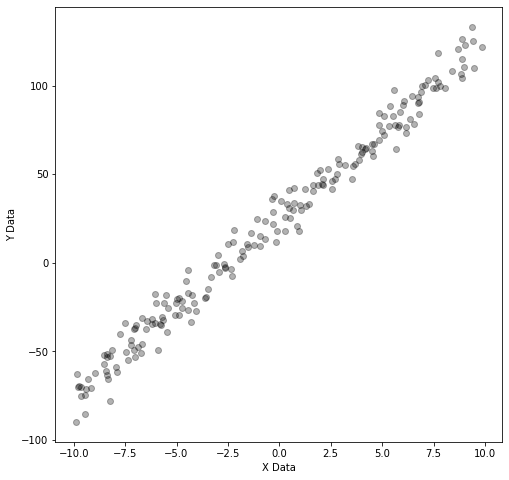

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style


path = "/content/drive/My Drive/data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.show()


data.csv 파일에서 데이터를 불러와서 검정색으로 좌표들을 출력함

9.934635539221306
24.90739329394621


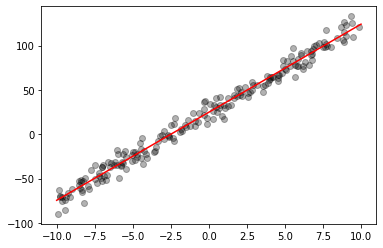

In [0]:


gradient_theta0 = float(0)
gradient_theta1 = float(0)
theta0 = float(-30)
theta1 = float(-30)
new_theta0 = float(0)
new_theta1 = float(0)
learning_rate = float(0.001)
m = float(len(x_data))
space_theta0 = [float]
space_theta1 = [float]

for i in range(100000):
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    gradient_theta0 += (1/m) * x * (((theta0 * x) + theta1) - y)
    gradient_theta1 += (1/m) * (((theta0 * x) + theta1) - y)
  new_theta0 = theta0 - (learning_rate * gradient_theta0)
  new_theta1 = theta1 - (learning_rate * gradient_theta1)
  gradient_theta0 = float(0)
  gradient_theta1 = float(0) #초기화
  theta0 = new_theta0
  theta1 = new_theta1
  space_theta0.append(theta0)
  space_theta1.append(theta0)

#print(space_theta0[0])
#print(len(space_theta0))
print(theta0)
print(theta1)
#print(theta0)
#print(theta1)

x = np.linspace(-10,10,40)
y = theta0*x+theta1
plt.scatter(x_data, y_data, alpha=0.3, color='black')
plt.plot(x,y, c='red')
plt.show()




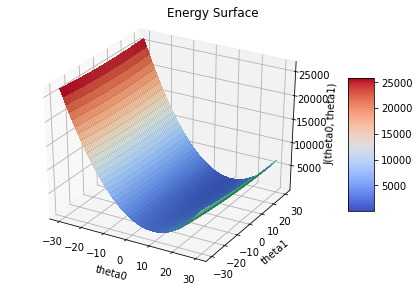

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')

theta0 = np.arange(float(-30), float(30), float(0.1))
theta1 = np.arange(float(-30), float(30), float(0.1))
theta0, theta1 = np.meshgrid(theta0, theta1)
J = float(0)
for k in range(len(x_data)):
  x = x_data[k]
  y = y_data[k]
  J += (1/(2*m))*((theta0*x)+theta1-y)*((theta0*x)+theta1-y)
surf = ax.plot_surface(theta0,theta1,J,cmap='coolwarm',linewidth=0,antialiased=False)
wire = ax.plot_wireframe(theta0,theta1,J,color='g',linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta0, theta1)')
plt.suptitle('Energy Surface')
plt.show()


In [0]:
result = float(0)
J2 = [float]

for p in range(len(space_theta0)-1):
  for r in range(len(x_data)):
    x = x_data[r]
    y = y_data[r]
    result += (1/(2*m))*((space_theta0[p+1]*x)+space_theta1[p+1]-y)*((space_theta0[p+1]*x)+space_theta1[p+1]-y)
  J2.append(result)
  result = float(0)

#print(space_theta0[1])
#print(space_theta1[1])
#print(J2[1])

del space_theta0[0]
del space_theta1[0]
del J2[0]

print(space_theta0)


[-27.487967878581863, -26.29308685583065, -25.13719316334775, -24.019013849999887, -22.937317527833716, -21.89091301499387, -20.87864802295119, -19.89940788659435, -18.952114335785343, -18.035724307024967, -17.149228793918716, -16.29165173517616, -15.462048938918347, -14.659507042107695, -13.883142503953609, -13.132100632184475, -12.4055546411129, -11.702704740456134, -11.022777253907464, -10.365023766487186, -9.728720299733482, -9.113166513824188, -8.517684935750129, -7.941620212689414, -7.384338389759861, -6.845226211353567, -6.323690445283645, -5.819157228998289, -5.331071437141649, -4.858896069764502, -4.402111660510513, -3.960215704125824, -3.532722102661078, -3.1191606297555237, -2.7190764124128224, -2.332029429697418, -1.957594027799006, -1.595358450930663, -1.2449243875436489, -0.9059065313587785, -0.5779321567305846, -0.2606407078762927, 0.04631659848309455, 0.3432771575075229, 0.6305673480720415, 0.9085028924601788, 1.1773892043129464, 1.4375217252169408, 1.689186250302484, 1

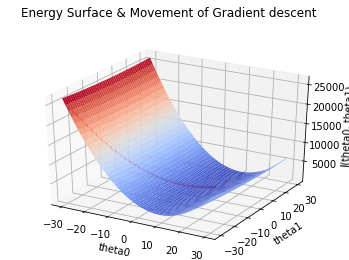

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta0 = np.arange(float(-30), float(30), float(0.1))
theta1 = np.arange(float(-30), float(30), float(0.1))
theta0, theta1 = np.meshgrid(theta0, theta1)
J = float(0)
for k in range(len(x_data)):
  x = x_data[k]
  y = y_data[k]
  J += (1/(2*m))*((theta0*x)+theta1-y)*((theta0*x)+theta1-y)

ax.plot(space_theta0, space_theta1, J2, color="red")
ax.plot_surface(theta0,theta1,J,cmap='coolwarm',linewidth=0)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J(theta0, theta1)')
plt.suptitle('Energy Surface & Movement of Gradient descent')

plt.show()

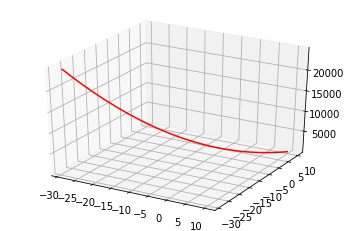

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(space_theta0, space_theta1, J2, mfc="none", color="red")
plt.show()